## Import Data

In [232]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
heart = pd.read_csv("heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Cleaning

In [234]:
heart.isna().sum().sort_values(ascending= False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

So amazing, there are not missing values to handle. So we will skip to the EDA step

## EDA

Text(0.5, 1.0, 'Properties in Age')

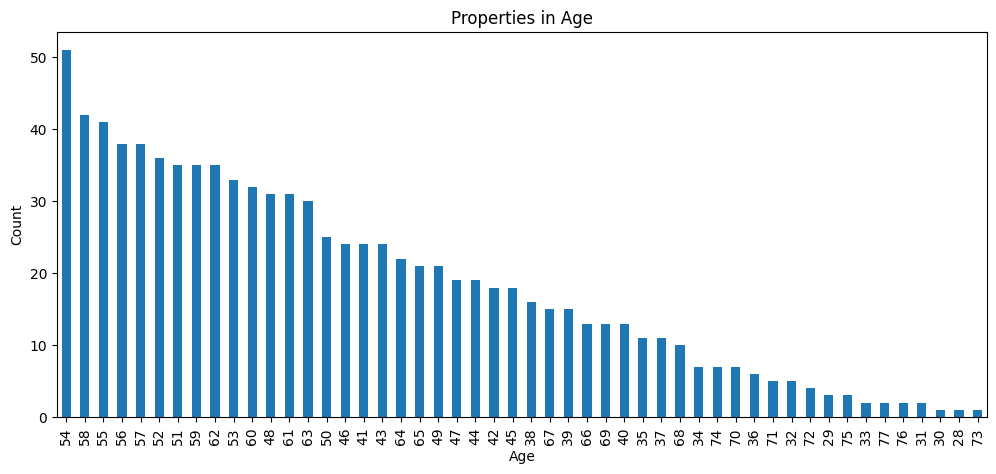

In [235]:
plt.figure(figsize= (12, 5))
heart['Age'].value_counts().plot(kind= 'bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Properties in Age')

Text(0.5, 1.0, 'Unit of Sex')

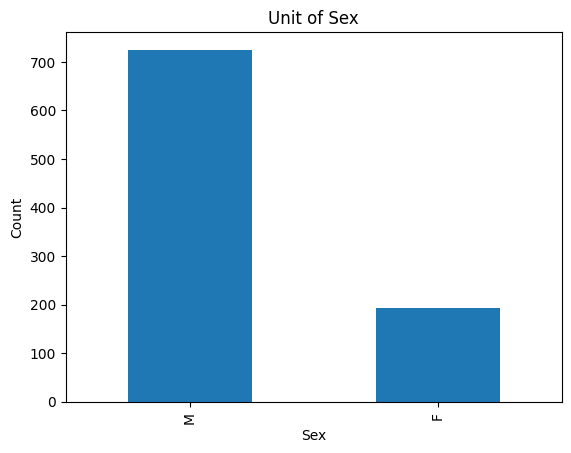

In [236]:
heart['Sex'].value_counts().plot(kind= 'bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Unit of Sex')

Text(0.5, 1.0, 'Properties in Exercises')

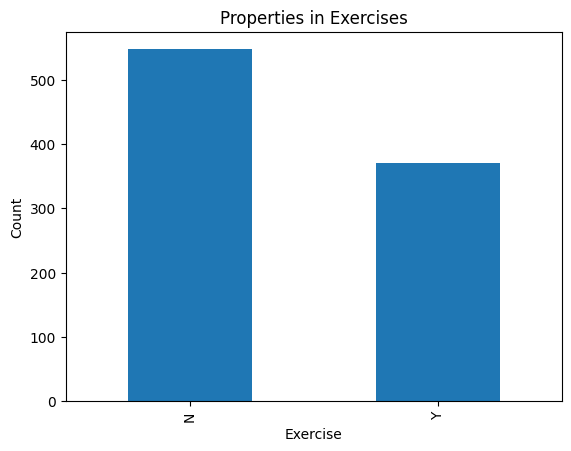

In [237]:
heart['ExerciseAngina'].value_counts().plot(kind= 'bar')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.title('Properties in Exercises')

Looking at the barplots above:
1. Most of age in this dataset is middle age and approaching old age (59-60), specially the age of 54
2. Properties about sex are concentrated on Male (> 700)
3. Probability of people who do not exercise is more than that of people who exercise, particularly 550 and 350

#### Plot 3 features above with probability of heart disease

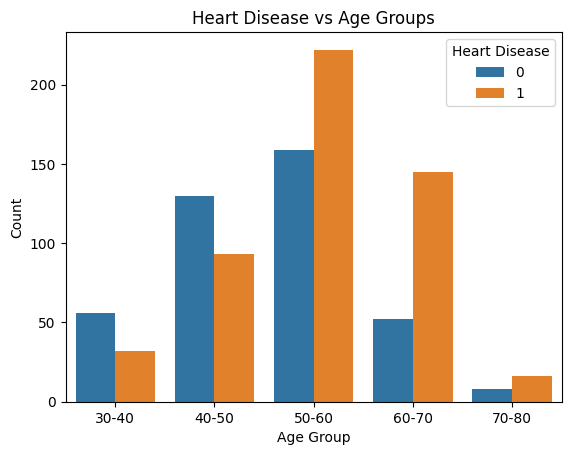

In [238]:
# Group data by age to create age bins
heart['AgeGroup'] = pd.cut(heart['Age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

# Plot bar plot
sns.countplot(x='AgeGroup', hue='HeartDisease', data= heart)
plt.title('Heart Disease vs Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

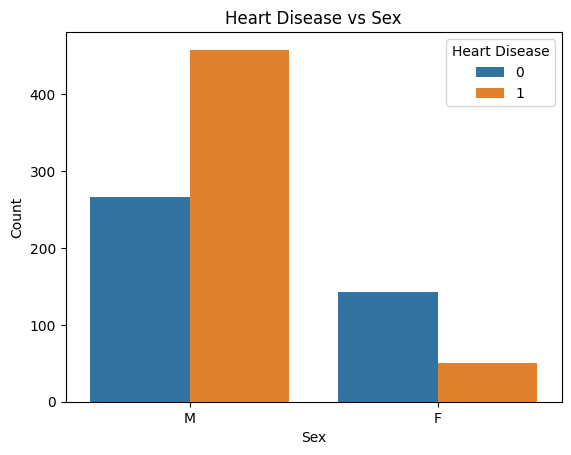

In [239]:
#Plot bar plot
sns.countplot(x= 'Sex', hue= 'HeartDisease', data= heart)
plt.title('Heart Disease vs Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

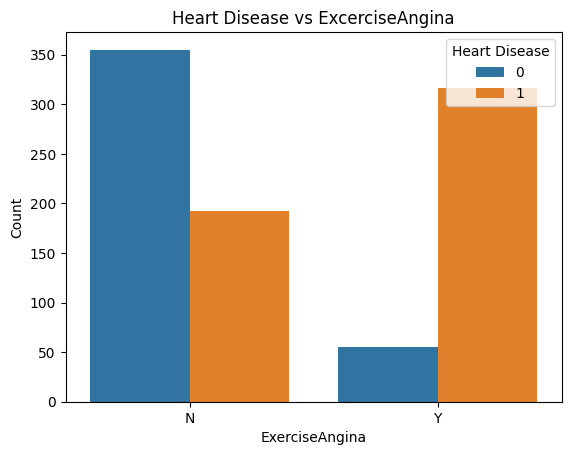

In [240]:
#Plot bar plot
sns.countplot(x= 'ExerciseAngina', hue= 'HeartDisease', data= heart)
plt.title('Heart Disease vs ExcerciseAngina')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')
plt.legend(title= 'Heart Disease', loc= 'upper right')
plt.show()

You can see the relationship between the features before and heart disease:
1. Most of people from 50-70 will have high probability of heart disease 
2. Definitely, Men have a higher rate of heart disease than women
3. It's an incredible thing that people who do not exercise have lower rate of heart disease than peolple exercise. It's so strange

## Data Preprocessing

1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

In [241]:
heart.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
AgeGroup          category
dtype: object

In [242]:
#Select Numerical Features for Z-score Calculation
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR']

# Create a subset of the dataframe with the selected columns
df_numerical = heart[numerical_cols]

In [243]:
df_numerical.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR
0,40,140,289,0,172
1,49,160,180,0,156
2,37,130,283,0,98
3,48,138,214,0,108
4,54,150,195,0,122


- Function to calculate Z-scores

In [244]:
## Calculate Z-scores
def calculate_Z_scores(df):
    # Create an empty DataFrame to store Z-scores
    z_scores_df = pd.DataFrame()
    
    # Iterate over each column to calculate the Z-score
    for col in df.columns:
        mean = np.mean(df[col])
        st_dev = np.std(df[col])
        
        z_scores_df[col] = (df[col] - mean) / st_dev
        
    return z_scores_df

In [245]:
z_scores = np.abs(calculate_Z_scores(df_numerical))

In [246]:
z_scores[:5]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR
0,1.433140,0.410909,0.825070,0.551341,1.382928
1,0.478484,1.491752,0.171961,0.551341,0.754157
2,1.751359,0.129513,0.770188,0.551341,1.525138
3,0.584556,0.302825,0.139040,0.551341,1.132156
4,0.051881,0.951331,0.034755,0.551341,0.581981


Typically, a Z-score greater than 3 or less than -3 is considered an outlier. Now, you can filter out rows where any of the numerical columns have Z-scores outside this range.

In [247]:
# Extract outliers 
outliers = (z_scores > 3).any(axis= 1)

# Keep only rows without outliers
df_no_outliers = heart[~outliers]

# Print the shape of the new dataframe
print(f"Original dataset shape: {heart.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (918, 13)
Dataset shape after removing outliers: (906, 13)


In [248]:
df_no_outliers.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,30-40
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,30-40
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-60


2. Convert text columns to numbers using label encoding and one hot encoding

In [249]:
df_no_outliers.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
AgeGroup          category
dtype: object

In [250]:
df_no_outliers.drop('AgeGroup', axis= 1, inplace= True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_23524\1880610448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop('AgeGroup', axis= 1, inplace= True)


- You can see that the RestingECG and ST_Slope are ordinal categorical features, so we will use Label Encoder method to convert to numbers
- The remaining text columns are norminal categorical features, so we will use One-hot-encoding method to convert to numbers

In [251]:
# Covert those norminal categorical features to number
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

nor_categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina']

one_hot_encode = encoder.fit_transform(df_no_outliers[nor_categorical_cols])

one_hot_df = pd.DataFrame(one_hot_encode, columns= encoder.get_feature_names_out(nor_categorical_cols), index= df_no_outliers.index)

df_encoded = pd.concat([df_no_outliers, one_hot_df], axis= 1)

df_encoded.drop(nor_categorical_cols, axis= 1, inplace= True)

In [252]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,Normal,172,0.0,Up,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,49,160,180,0,Normal,156,1.0,Flat,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,130,283,0,ST,98,0.0,Up,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,48,138,214,0,Normal,108,1.5,Flat,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,150,195,0,Normal,122,0.0,Up,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [253]:
# Covert those ordinal categorical features to number
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

df_encoded['RestingECG'] = label_encode.fit_transform(df_encoded['RestingECG'])
df_encoded['ST_Slope'] = label_encode.fit_transform(df_encoded['ST_Slope'])

In [254]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,1,172,0.0,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,49,160,180,0,1,156,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,130,283,0,2,98,0.0,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,48,138,214,0,1,108,1.5,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,150,195,0,1,122,0.0,2,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Looking at the DataFrame, now we completed to convert all text columns to number

3. Apply Scailing

In [255]:
from sklearn.preprocessing import StandardScaler

exception_col = ['HeartDisease']

features = df_encoded.drop(exception_col, axis= 1)

standard = StandardScaler()

scailed_features = standard.fit_transform(features)

df_scailed = pd.DataFrame(scailed_features, columns= features.columns)

df_scailed[exception_col] = df_encoded[exception_col].values


In [256]:
df_scailed.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,HeartDisease
0,-1.432687,0.460750,0.848846,-0.549294,0.012241,1.389406,-0.83126,1.046060,-0.515134,0.515134,-1.082895,2.073221,-0.532246,-0.231276,0.823273,-0.823273,0
1,-0.477875,1.624344,-0.169349,-0.549294,0.012241,0.756186,0.10838,-0.605038,1.941242,-1.941242,-1.082895,-0.482341,1.878829,-0.231276,0.823273,-0.823273,1
2,-1.750958,-0.121047,0.792799,-0.549294,1.596561,-1.539237,-0.83126,1.046060,-0.515134,0.515134,-1.082895,2.073221,-0.532246,-0.231276,0.823273,-0.823273,0
3,-0.583965,0.344390,0.148253,-0.549294,0.012241,-1.143474,0.57820,-0.605038,1.941242,-1.941242,0.923450,-0.482341,-0.532246,-0.231276,-1.214664,1.214664,1
4,0.052577,1.042547,-0.029230,-0.549294,0.012241,-0.589407,-0.83126,1.046060,-0.515134,0.515134,-1.082895,-0.482341,1.878829,-0.231276,0.823273,-0.823273,0


In [257]:
df_scailed.isna().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG           0
MaxHR                0
Oldpeak              0
ST_Slope             0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
ExerciseAngina_N     0
ExerciseAngina_Y     0
HeartDisease         0
dtype: int64

## Building models

In [258]:
X = df_scailed.drop('HeartDisease', axis= 1)
y = df_scailed['HeartDisease']

In [259]:
X.shape

(906, 16)

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 30)

In [261]:
# SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_score = round(100 * accuracy_score(y_pred, y_test), 2)
print('Accuracy of SVM model:', 100*accuracy_score(y_pred, y_test))

Accuracy of SVM model: 87.36263736263736


In [262]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
lgr_score = round(100 * accuracy_score(y_pred, y_test), 2)
print('Accuracy of Logistic Regression Model:', 100*accuracy_score(y_pred, y_test))

Accuracy of Logistic Regression Model: 85.16483516483517


In [263]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score = round(100 * accuracy_score(y_pred, y_test), 2)
print('Accuracy of Random Forest Model:', 100*accuracy_score(y_pred, y_test))

Accuracy of Random Forest Model: 88.46153846153845


In [264]:
# Naive Bayes Model 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_score = round(100 * accuracy_score(y_pred, y_test), 2)
print('Accuracy of Naive Bayes Model:', 100*accuracy_score(y_pred, y_test))

Accuracy of Naive Bayes Model: 85.16483516483517


In [265]:
models = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 'Random Forest Classifier', 'Naive Bayes'],
    'Scores': [svm_score, lgr_score, rf_score, nb_score]
})

models.sort_values(by= 'Scores', ascending= False)

,Model,Scores
2,Random Forest Classifier,88.46
0,SVM,87.36
1,Logistic Regression,85.16
3,Naive Bayes,85.16


So you can see the DataFrame I create, the best model for this dataset is Random Forest Classifier with the score is 88.46%

## Try using PCA to reduce the dimension

In [266]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(906, 12)

In [267]:
pca.explained_variance_ratio_

array([0.25052764, 0.11810056, 0.08997438, 0.08503291, 0.07679464,
       0.07053594, 0.0598676 , 0.05303103, 0.05041977, 0.04857843,
       0.03845659, 0.03287792])

In [268]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size= 0.2, random_state= 30)

In [269]:
model = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest Classifier': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

score = []

for name, m in model.items():
    m.fit(X_train_pca, y_train_pca)
    
    y_pred = m.predict(X_test_pca)
    
    sco = round(100*accuracy_score(y_pred, y_test_pca), 2)
    
    score.append({'Models': name, 'Scores': sco})
    
    
df_pca = pd.DataFrame(score)
df_pca.sort_values(by= 'Scores', ascending= False)

,Models,Scores
0,SVM,86.26
1,Logistic Regression,85.16
3,Naive Bayes,83.52
2,Random Forest Classifier,82.97


You can see after using PCA to reduce the dimension, the result changed now the best model is SVM if we use PCA (86.26%)